## Problem Statement:

Loans provide the opportunity to link up lenders with those in need of capital. The investors make profit due to interest tacked onto the loan. However, not all loans see their principal paid until the end, and when the loan is not paid-in-full (PIF) then the loan is charged-off. When this occurs, the lender loses money and due to the chance of charge-off when it comes to personal loans, it is imperative that the platforms providing this link between lenders and borrowers have a risk model to mitigate potential charge-off based on borrower information. This study aims to train several machine learning models to classify if a borrower will repay the loan or potentially charge-off using Lending Tree data from 2007 - 2015. The guiding metric will be the area under the ROC curve (AUC), specifically the precision-recall AUC score. 
    

Minimizes costs spent in collection efforts as well as legal fees. Attract investors as they will have peace of mind that their money is not at risk when it is in the hands of a lending platform such as Lending Club. With the ability to discern if a borrower will Lenders can use different methods to assess the level of credit risk of a potential borrower in order to mitigate losses and avoid delayed payments, such as having higher interest loans as a way to mitigate against high risk loans. 

Possible Risks and Assumptions:

- Data comes from Kaggle and is application data, there can be missing data at random
- Both linear and non-linear relationships between variables which we can address in models
- Multicollinearity in our dependent variables due to many of them being credit-related (card utilization, accounts present)
- Data is coming from Lending Club which may have a certain limitation of scope, mainly personal loans capped at 40_000 which doesn't reflect all types of loans and loan amounts
- We would assume our observations/specific loan data are independent (can check to see if there are renewal loans...perhaps shared ID)

## Data Imports and Cleaning

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [134]:
# Reading in our data from Kaggle, all accepted loans from 2007 to 2018 Q4
loan = pd.read_csv('./data/accepted_2007_to_2018Q4.csv')

C:\Users\eddie\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


We are reducing the number of features to those that will be present to an investor when presented with a loan application. This would include information such as the loan amount, term of the loan, interest rate, debt-to-income ratio, FICO score, and basic credit history. There were multiple features in the original data set for secondary applicants as there were loans for joint applications. For this study, we will solely model using individual loans 

In [135]:

col_list = ['loan_amnt', 'term', 'int_rate', 'installment',
       'emp_length', 'home_ownership', 'annual_inc', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'total_acc', 'pub_rec', 'revol_bal', 'earliest_cr_line',
       'revol_util', 'last_fico_range_high',
       'last_fico_range_low', 'application_type', 'acc_now_delinq',
       'avg_cur_bal', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'mort_acc']

In [136]:
loan = loan[col_list]

In [137]:
loan.head()

,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,issue_d,...,last_fico_range_high,last_fico_range_low,application_type,acc_now_delinq,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,mort_acc
0,3600.0,36 months,13.99,123.03,C,leadman,10+ years,MORTGAGE,55000.0,Dec-2015,...,564.0,560.0,Individual,0.0,20701.0,0.0,0.0,0.0,0.0,1.0
1,24700.0,36 months,11.99,820.28,C,Engineer,10+ years,MORTGAGE,65000.0,Dec-2015,...,699.0,695.0,Individual,0.0,9733.0,0.0,0.0,0.0,0.0,4.0
2,20000.0,60 months,10.78,432.66,B,truck driver,10+ years,MORTGAGE,63000.0,Dec-2015,...,704.0,700.0,Joint App,0.0,31617.0,0.0,0.0,0.0,0.0,5.0
3,35000.0,60 months,14.85,829.90,C,Information Systems Officer,10+ years,MORTGAGE,110000.0,Dec-2015,...,679.0,675.0,Individual,0.0,23192.0,0.0,0.0,0.0,0.0,1.0
4,10400.0,60 months,22.45,289.91,F,Contract Specialist,3 years,MORTGAGE,104433.0,Dec-2015,...,704.0,700.0,Individual,0.0,27644.0,0.0,0.0,0.0,0.0,6.0


In [138]:
loan.shape

(2260701, 34)

In [139]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 34 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   loan_amnt                 float64
 1   term                      object 
 2   int_rate                  float64
 3   installment               float64
 4   grade                     object 
 5   emp_title                 object 
 6   emp_length                object 
 7   home_ownership            object 
 8   annual_inc                float64
 9   issue_d                   object 
 10  loan_status               object 
 11  purpose                   object 
 12  addr_state                object 
 13  dti                       float64
 14  delinq_2yrs               float64
 15  fico_range_low            float64
 16  fico_range_high           float64
 17  inq_last_6mths            float64
 18  open_acc                  float64
 19  total_acc                 float64
 20  pub_rec                 

In [163]:
loan.isna().sum()

loan_amnt                       0
term                            0
int_rate                        0
installment                     0
grade                           0
emp_title                   81957
emp_length                  74764
home_ownership                  0
annual_inc                      0
issue_d                         0
loan_status                     0
purpose                         0
addr_state                      0
dti                             0
delinq_2yrs                     0
fico_range_low                  0
fico_range_high                 0
inq_last_6mths                  1
open_acc                        0
total_acc                       0
pub_rec                         0
revol_bal                       0
earliest_cr_line                0
revol_util                    812
last_fico_range_high            0
last_fico_range_low             0
application_type                0
acc_now_delinq                  0
avg_cur_bal                 67546
chargeoff_with

In [158]:
for c in loan.columns:
    if loan[c].dtype == 'object':
        print(c)
        

term
grade
emp_title
emp_length
home_ownership
issue_d
purpose
addr_state
earliest_cr_line
application_type


Target Variable

In [141]:
#Slicing our dataframe so that it only contains loans which are fully paid off or charged-off
loan = loan.loc[loan['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [142]:
loan.loan_status.value_counts(dropna = False)

Fully Paid     1076751
Charged Off     268559
Name: loan_status, dtype: int64

In [154]:
loan['loan_status'] = loan['loan_status'].map({
    'Fully Paid': 0,
    'Charged Off': 1
})

In [144]:
loan.application_type.value_counts()

Individual    1319510
Joint App       25800
Name: application_type, dtype: int64

In [150]:
loan = loan[loan['application_type'] == 'Individual']

In [156]:
loan['application_type'].value_counts(dropna = False)

Individual    1319510
Name: application_type, dtype: int64

In [159]:
loan['term'] = loan['term'].map({
    ' 36 months' : 0,
    ' 60 months' : 1
})

In [151]:
loan.shape

(1319510, 34)

In [153]:
loan.purpose.value_counts(dropna = False)

debt_consolidation    764351
credit_card           290840
home_improvement       85456
other                  76429
major_purchase         28931
small_business         15180
medical                15097
car                    14380
moving                  9289
vacation                8934
house                   7085
wedding                 2294
renewable_energy         918
educational              326
Name: purpose, dtype: int64

In [155]:
loan.loan_status.value_counts(dropna = False, normalize = True)

0    0.801279
1    0.198721
Name: loan_status, dtype: float64

In [73]:
loan.loan_status.value_counts(dropna = False, normalize = True)

0    0.801279
1    0.198721
Name: loan_status, dtype: float64

In [74]:
loan.shape

(1319510, 64)

In [160]:
null_count = []
#for columns in loan.columns[0:100]:
    if loan[columns].isna().sum() != 0:
        print('FEATURE NAME:')
        print(columns)
        print('NULL VALUE COUNT:')
        print(loan[columns].isna().sum())
        print('PERCENT OF ALL VALUES:')
        print(loan[columns].isna().sum() / len(loan[columns]))
        print('~~~~~~~~~~~~~~~~~~~')
        null_count.append([columns, loan[columns].isna().sum(), loan[columns].isnull().mean()])
null_values = pd.DataFrame(null_count, columns = ['Feature', 'Null Value Count', 'Percentage of Data'])

IndentationError: unexpected indent (<ipython-input-160-7579c901a644>, line 3)

In [161]:
#null_values.sort_values('Null Value Count', ascending = False).head(50)

In [162]:
#null_values.sort_values('Null Value Count', ascending = False).tail(26)

In [78]:
#bad_cols = loan.columns[loan.isnull().mean() > 0.5]

In [79]:
#loan.drop(columns = bad_cols, inplace = True)

Dealing with null values:
- Possibly remove missing values (not recommended)
- Impute null with median
- Longer: Find relationship between features that share similar number of null values to see if there is a pattern and determine what can be imputed to reflect accurate info from participant (we can see this for number of accounts so it does not appear to be completely at random..just a guess)
- Checking correlation between features to drop ones that are experiencing severe multicollinearity

In [30]:
loan.reset_index(drop = True)

,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,3600.0,36 months,13.99,123.03,C,leadman,10+ years,MORTGAGE,55000.0,Not Verified,...,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0
1,24700.0,36 months,11.99,820.28,C,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,...,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0
2,20000.0,60 months,10.78,432.66,B,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,...,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0
3,10400.0,60 months,22.45,289.91,F,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,...,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0
4,11950.0,36 months,13.44,405.18,C,Veterinary Tecnician,4 years,RENT,34000.0,Source Verified,...,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345305,18000.0,60 months,9.49,377.95,B,NaN,5 years,OWN,130000.0,Not Verified,...,0.0,0.0,100.0,33.3,0.0,0.0,275356.0,54349.0,13100.0,77756.0
1345306,29400.0,60 months,13.99,683.94,C,Chief Operating Officer,9 years,MORTGAGE,180792.0,Not Verified,...,0.0,2.0,100.0,42.9,0.0,0.0,719056.0,148305.0,56500.0,95702.0
1345307,32000.0,60 months,14.49,752.74,C,Sales Manager,3 years,MORTGAGE,157000.0,Source Verified,...,0.0,2.0,100.0,0.0,0.0,0.0,524379.0,122872.0,15800.0,23879.0
1345308,16000.0,60 months,12.79,362.34,C,Manager,10+ years,RENT,150000.0,Not Verified,...,0.0,2.0,92.0,50.0,3.0,0.0,87473.0,65797.0,10100.0,73473.0


In [31]:
loan['application_type'].value_counts(dropna = False)

Individual    1319510
Joint App       25800
Name: application_type, dtype: int64

In [32]:
for c in loan.columns:
    if loan[c].dtype == 'object':
        print(c)
        print(loan[c].isna().sum())

term
0
grade
0
emp_title
85785
emp_length
78511
home_ownership
0
verification_status
0
issue_d
0
purpose
0
addr_state
0
last_credit_pull_d
55
application_type
0


In [33]:
loan

,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,3600.0,36 months,13.99,123.03,C,leadman,10+ years,MORTGAGE,55000.0,Not Verified,...,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0
1,24700.0,36 months,11.99,820.28,C,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,...,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0
2,20000.0,60 months,10.78,432.66,B,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,...,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0
4,10400.0,60 months,22.45,289.91,F,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,...,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0
5,11950.0,36 months,13.44,405.18,C,Veterinary Tecnician,4 years,RENT,34000.0,Source Verified,...,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,18000.0,60 months,9.49,377.95,B,NaN,5 years,OWN,130000.0,Not Verified,...,0.0,0.0,100.0,33.3,0.0,0.0,275356.0,54349.0,13100.0,77756.0
2260690,29400.0,60 months,13.99,683.94,C,Chief Operating Officer,9 years,MORTGAGE,180792.0,Not Verified,...,0.0,2.0,100.0,42.9,0.0,0.0,719056.0,148305.0,56500.0,95702.0
2260691,32000.0,60 months,14.49,752.74,C,Sales Manager,3 years,MORTGAGE,157000.0,Source Verified,...,0.0,2.0,100.0,0.0,0.0,0.0,524379.0,122872.0,15800.0,23879.0
2260692,16000.0,60 months,12.79,362.34,C,Manager,10+ years,RENT,150000.0,Not Verified,...,0.0,2.0,92.0,50.0,3.0,0.0,87473.0,65797.0,10100.0,73473.0


In [34]:
loan['loan_status'].mean()

0.19962610848057324

Loan grade is the specific grade assigned by Lending Club. We would want to remove this from our model since it does not meet our requirements for the feature. We want to build a model that takes in information that is known when the borrower applies and including Lending Club's rating of a loan application would only hurt our model. It would include Lending Club's own rating of a loan based on the loan information. For now we can leave it out and possibly compare it to our own model. 

In [36]:
loan.term.value_counts(dropna = False)

0    1020743
1     324567
Name: term, dtype: int64

In [37]:
#loan.drop(columns = ['emp_title'], inplace = True)

In [38]:
for c in loan.columns:
    if loan[c].dtype == 'object':
        print(c)

grade
emp_title
emp_length
home_ownership
verification_status
issue_d
purpose
addr_state
last_credit_pull_d
application_type


In [39]:
loan.emp_length.value_counts(dropna = False, normalize = True)

10+ years    0.328697
2 years      0.090494
< 1 year     0.080324
3 years      0.079979
1 year       0.065780
5 years      0.062554
4 years      0.059879
NaN          0.058359
6 years      0.046631
8 years      0.045120
7 years      0.044320
9 years      0.037863
Name: emp_length, dtype: float64

To 

In [40]:
emp_length_dict = {
    '< 1 year' : '<1 year',
    '1 year'   : '1-5 years',
    '2 years'  : '1-5 years',
    '3 years'  : '1-5 years',
    '4 years'  : '1-5 years',
    '5 years'  : '1-5 years',
    '6 years'  : '5-10 years',
    '7 years'  : '5-10 years',
    '8 years'  : '5-10 years',
    '9 years'  : '5-10 years',
    '10+ years': '10+ years',
}

In [41]:
loan.emp_length = loan.emp_length.map(emp_length_dict)

In [42]:
loan.emp_length.value_counts(dropna = False, normalize = True)

1-5 years     0.358686
10+ years     0.328697
5-10 years    0.173934
<1 year       0.080324
NaN           0.058359
Name: emp_length, dtype: float64

In [43]:
not_employed = len(loan[loan.emp_title.isnull()])

In [44]:
not_employed

85785

In [45]:
loan[loan.emp_title.isnull()].groupby('emp_length')['emp_length'].count().sort_values() / not_employed

emp_length
<1 year       0.012508
5-10 years    0.016203
1-5 years     0.028968
10+ years     0.033934
Name: emp_length, dtype: float64

We can see that for those that have no employment title provided also happen to be ~90% of those that reported no employment length. This may show that those with no employment length are never employed, self-employed, students or possibly retired. Due to this, we will keep these values of 'n/a' in employment length as their own category. We will be dropping the emp_title column due to the high number of unique titles (371,436).

In [46]:
len(loan.emp_title.unique())

378354

In [47]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1345310 entries, 0 to 2260697
Data columns (total 64 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   loan_amnt                   1345310 non-null  float64
 1   term                        1345310 non-null  int64  
 2   int_rate                    1345310 non-null  float64
 3   installment                 1345310 non-null  float64
 4   grade                       1345310 non-null  object 
 5   emp_title                   1259525 non-null  object 
 6   emp_length                  1266799 non-null  object 
 7   home_ownership              1345310 non-null  object 
 8   annual_inc                  1345310 non-null  float64
 9   verification_status         1345310 non-null  object 
 10  issue_d                     1345310 non-null  object 
 11  loan_status                 1345310 non-null  int64  
 12  purpose                     1345310 non-null  object 
 1

In [48]:
loan[['fico_range_high', 'fico_range_low']]

,fico_range_high,fico_range_low
0,679.0,675.0
1,719.0,715.0
2,699.0,695.0
4,699.0,695.0
5,694.0,690.0
...,...,...
2260688,739.0,735.0
2260690,709.0,705.0
2260691,739.0,735.0
2260692,669.0,665.0


In [49]:
loan['emp_length'].sort_values()

1122193    1-5 years
1779288    1-5 years
1779289    1-5 years
1281332    1-5 years
412021     1-5 years
             ...    
2260376          NaN
2260380          NaN
2260392          NaN
2260545          NaN
2260564          NaN
Name: emp_length, Length: 1345310, dtype: object

In [50]:
loan.home_ownership.value_counts(dropna = False)

MORTGAGE    665579
RENT        534421
OWN         144832
ANY            286
OTHER          144
NONE            48
Name: home_ownership, dtype: int64

In [51]:
for c in loan.columns:
    if loan[c].dtype == 'object':
        print(c)

grade
emp_title
emp_length
home_ownership
verification_status
issue_d
purpose
addr_state
last_credit_pull_d
application_type


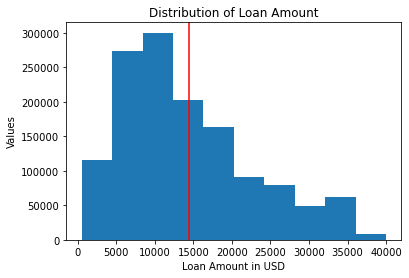

In [52]:
plt.hist(loan.loan_amnt, bins = 10)
plt.axvline(np.mean(loan.loan_amnt), color = 'red')
plt.xlabel('Loan Amount in USD')
plt.ylabel('Values')
plt.title('Distribution of Loan Amount');

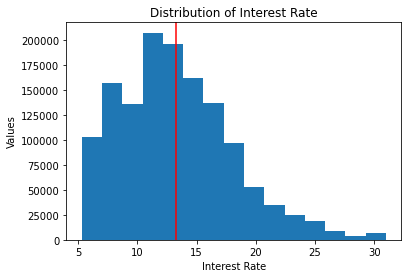

In [53]:
plt.hist(loan.int_rate, bins = 15)
plt.axvline(np.mean(loan.int_rate), color = 'red')
plt.xlabel('Interest Rate')
plt.ylabel('Values')
plt.title('Distribution of Interest Rate');

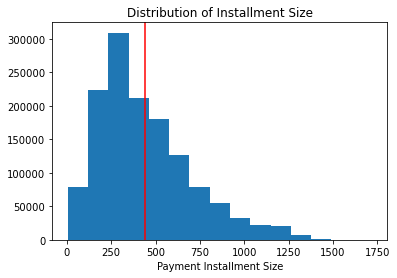

In [54]:
plt.hist(loan.installment, bins = 15)
plt.axvline(np.mean(loan.installment), color = 'red')
plt.xlabel('Payment Installment Size')
plt.title('Distribution of Installment Size');

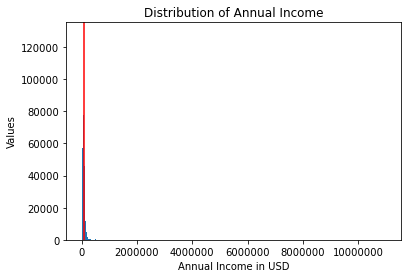

In [55]:
plt.hist(loan.annual_inc, bins = 2000)
plt.axvline(np.mean(loan.annual_inc), color = 'red')
plt.ticklabel_format(style='plain', axis='x',useOffset=False)
plt.xlabel('Annual Income in USD')
plt.ylabel('Values')
plt.title('Distribution of Annual Income');

In [56]:
log_annual = np.log(loan.annual_inc)

C:\Users\eddie\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [57]:
loan[loan.annual_inc == 0.0][

SyntaxError: unexpected EOF while parsing (<ipython-input-57-5d88646ea4cc>, line 1)

In [ ]:
plt.hist(log_annual)
plt.axvline(np.log(np.mean(loan.annual_inc)), color = 'red')
plt.ticklabel_format(style='plain', axis='x',useOffset=False)
plt.xlabel('Annual Income in USD')
plt.ylabel('Values')
plt.title('Distribution of Annual Income');

In [ ]:
sns.catplot(x = 'loan_status', kind = 'count', data = loan)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.title('Loan Status Breakdown')
plt.xlabel('Loan Status');

Large class imbalance we can see with our dependent variable. Loans that charged-off amount to 261,655 and loans that were fully paid amount to 1,041,952. In simple terms, there are ~4 times as many examples of loans that were fully paid off. Due to the class imbalance, we probably would not use our accuracy score considering if we guessed for all the loans to be fully paid off, we would be accurate at 79.93%. With that, we will use the precision-recall AUC score as it evaluates the faction of true positives among positive predictions.

In [ ]:
1041952/261655

In [ ]:
loan.describe().T.head(30)

### Models:
- Log Reg, tune for regularization
- Random Forest Classifier, bagging, diverse set of potential trees to be built
- KNN
- Naive Bayes(?) - independence of features, need to deal with multicoll.
- SVM
- Deep Neural Network